# CNN 2D Array Regression (PyTorch)
#### This is a modification of https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html
Typically CNN is used to for image classification. In this practice, sets of 2D arrays were used as input (instead of image files). <br>
Usually a regression problem is to find a single value at the end. That single value can be a type of measurement or probability of some kind. In this example a CNN model is used to predict a list of (an array of) an continuous measurement. <br>

A practical example of such situation might be, predicting a timeseries measurement of a system using a collection of time series measurements from different sensors. (e.g., can you measure a bearing temperature of a wind turbine using other sensor data from the wind turbine?) <br>

This CNN approach works better for steady state conditions rather than fast changing conditions.

In [1]:
# Import all that you need.

import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

import torch.optim as optim

In [2]:
# This is a mock data. There are 12 parameters and a target, in a linear system.
# It is assumed that there are 100 datapoints per parameter (simulating 100 seconds of 1Hz data).
# The test data has 5000 samples and the test set has 100 samples.
# Run either this cell or one below to generate data.

import numpy as np

sample_size = 5000
parameter_size = 12
train_batch_size = 50
sample_length = 100 # [sec]
test_size  = 100

# Train
X = []
y = []
for i in range(0,sample_size):
    parameter_array = []
    p = np.random.uniform(0,1,parameter_size)
    for j in range(0,parameter_size):
        parameter = p[j]*np.ones(sample_length)
        parameter_array += [parameter]
    
    target = np.zeros(parameter.shape)
    for j in range(0,parameter_size,2):
        target += (j+1)*parameter_array[j]
    
    for j in range(0,parameter_size):
        parameter_array[j] = (parameter_array[j]+np.random.normal(0,0.05,sample_length))
    target = (target+np.random.normal(0,0.05,sample_length))
    
    X += [[parameter_array]]
    y += [target]
    
X_train = torch.tensor(np.asarray(X),dtype=torch.float32)
y_train = torch.tensor(np.asarray(y),dtype=torch.float32)

trainset = torch.utils.data.TensorDataset(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size,
                                          shuffle=True, num_workers=2)


# Test
X = []
y = []
for i in range(0,test_size):
    parameter_array = []
    p = np.random.uniform(0,1,parameter_size)
    for j in range(0,parameter_size):
        parameter = p[j]*np.ones(sample_length)
        parameter_array += [parameter]
    
    target = np.zeros(parameter.shape)
    for j in range(0,parameter_size,2):
        target += (j+1)*parameter_array[j]
    
    for j in range(0,parameter_size):
        parameter_array[j] = (parameter_array[j]+np.random.normal(0,0.05,sample_length))
    target = (target+np.random.normal(0,0.05,sample_length))
    
    X += [[parameter_array]]
    y += [target]
    
X_test = torch.tensor(np.asarray(X),dtype=torch.float32)
y_test = torch.tensor(np.asarray(y),dtype=torch.float32)

# Here you decide the batch size (how many of the datapoints you want to fit in a single bucket).
# Make sure it's reasonably size. You don't want 1 bucket or n buckets. Try to make 10-20 buckets.
testset = torch.utils.data.TensorDataset(X_test, y_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_size,
                                          shuffle=True, num_workers=2)

In [3]:
# This is another mock data. There are 12 parameters and a target, in a non-linear system.
# It is assumed that there are 100 datapoints per parameter (simulating 100 seconds of 1Hz data).
# The test data has 5000 samples and the test set has 100 samples.
# Run either this cell or one above to generate data.

import numpy as np

sample_size = 5000
parameter_size = 12
train_batch_size = 50
sample_length = 100 # [sec]
test_size  = 100

# Train
X = []
y = []
for i in range(0,sample_size):
    parameter_array = []
    p = np.random.uniform(0,1,parameter_size)
    for j in range(0,parameter_size):
        parameter = p[j]*np.ones(sample_length)
        parameter_array += [parameter]
    
    target = np.zeros(parameter.shape)
    for j in range(0,parameter_size):
        target += (j+1)*np.power(parameter_array[j],2)
    
    for j in range(0,parameter_size):
        parameter_array[j] = (parameter_array[j]+np.random.normal(0,0.05,sample_length))
    target = (target+np.random.normal(0,0.05,sample_length))
    # Adding more non-linearity
    target = target + 20*parameter_array[5]*parameter_array[6] + 20*parameter_array[7]*parameter_array[8]
    
    X += [[parameter_array]]
    y += [target]
    
X_train = torch.tensor(np.asarray(X),dtype=torch.float32)
y_train = torch.tensor(np.asarray(y),dtype=torch.float32)

trainset = torch.utils.data.TensorDataset(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size,
                                          shuffle=True, num_workers=2)


# Test
X = []
y = []
for i in range(0,test_size):
    parameter_array = []
    p = np.random.uniform(0,1,parameter_size)
    for j in range(0,parameter_size):
        parameter = p[j]*np.ones(sample_length)
        parameter_array += [parameter]
    
    target = np.zeros(parameter.shape)
    for j in range(0,parameter_size):
        target += (j+1)*np.power(parameter_array[j],2)
    
    for j in range(0,parameter_size):
        parameter_array[j] = (parameter_array[j]+np.random.normal(0,0.05,sample_length))
    target = (target+np.random.normal(0,0.05,sample_length))
    # Adding more non-linearity
    target = target + 20*parameter_array[5]*parameter_array[6] + 20*parameter_array[7]*parameter_array[8]
    
    X += [[parameter_array]]
    y += [target]
    
X_test = torch.tensor(np.asarray(X),dtype=torch.float32)
y_test = torch.tensor(np.asarray(y),dtype=torch.float32)

# Here you decide the batch size (how many of the datapoints you want to fit in a single bucket).
# Make sure it's reasonably size. You don't want 1 bucket or n buckets. Try to make 10-20 buckets.
testset = torch.utils.data.TensorDataset(X_test, y_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_size,
                                          shuffle=True, num_workers=2)

### Image of the hand-written note classification model

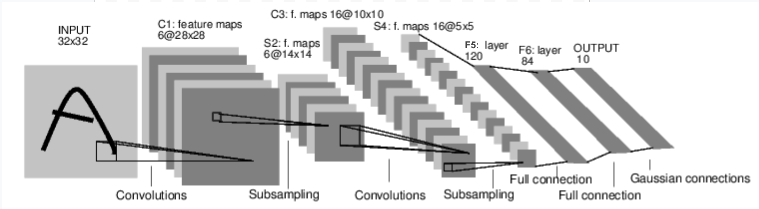

The CNN below is based on this hand-written note classification model.

In [4]:
# This is the CNN.
# The output layer was modified to have 100 output nodes.
# You need to change the input cell numbers.

class CS_classifier(nn.Module):

    def __init__(self):
        super(CS_classifier, self).__init__()
        # 1 input image channel, 10 output channels, 3x7 rectangular convolution.
        # 10 input image channel, 16 output channels, 3x3 square convolution.
        # kernel
        self.conv1 = nn.Conv2d(1,  10, (3,7))
        self.conv2 = nn.Conv2d(10, 16, (3,3))
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 92 * 8, 100)  # 92x8 from the second convolution layer
        self.fc2 = nn.Linear(100, 100)

    def forward(self, x):
        # No max pooling
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = CS_classifier()

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [5]:
# Test the data to see if all the data formats checks out.
# Usually the error occurs at 2 places:
#   1. You're using multiple channels instead of multiple batches. 
#      Remember CNN is typically used for image recognition. It expects 1 or 3 channels (typically).
#      We're using the building blocks to work with a generic 2D array input.
#      We're just using 1 channel (as if it's a black/white image).
#   2. Your input/output size from one convolution to next doesn't match.
#      When you deal with different input sizes, (hand) calculate the sizes of each layer to make adjestment at F5 input.

# This will return garbage answers (output from the CNN with random initial hyperparameters).
# You're just checking if all the connections/data dimensions work. Don't pay too much attention to the output.
print(X_test.shape)
print(y_test.shape)
input = X_test


output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

torch.Size([100, 1, 12, 100])
torch.Size([100, 100])

Raw output:
tensor([[ 0.0642,  0.1119, -0.0624,  ..., -0.0662,  0.0409,  0.0037],
        [ 0.0422,  0.1088, -0.0500,  ..., -0.0572,  0.0445,  0.0122],
        [ 0.0523,  0.0847, -0.0466,  ..., -0.0617,  0.0304, -0.0093],
        ...,
        [ 0.0595,  0.0651, -0.0526,  ..., -0.0527,  0.0376, -0.0222],
        [ 0.0424,  0.0727, -0.0441,  ..., -0.0459,  0.0313, -0.0262],
        [ 0.0654,  0.0684, -0.0405,  ..., -0.0628,  0.0373, -0.0258]],
       grad_fn=<AddmmBackward0>)
torch.Size([100, 100])


In [6]:
# Here you're actually training the model.
# For very simple tasks with well divided batches of data will get you good output with a few epochs.
# Play with the epoch to see if it improves.

plot_x = []
plot_y = []

for epoch in range(100):  # loop over the dataset multiple times
    print(f"Epoch {epoch+1}")
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        '''
        if i % 50 == 0:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.8f' % (epoch + 1, i + 1, running_loss / 100))
            plot_x += [epoch]
            plot_x += [running_loss]
            running_loss = 0.0
        '''
    # Test the CNN with test data at every epoch. Save the loss(EMS loss) for plotting.
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            print('MSE Loss: {:4.4f}'.format(loss.item()), '\n---------------------------')
    plot_x += [epoch]
    plot_y += [loss.item()]


print('\nFinished Training')

Epoch 1
MSE Loss: 281.6381 
---------------------------
Epoch 2
MSE Loss: 63.1543 
---------------------------
Epoch 3
MSE Loss: 43.1521 
---------------------------
Epoch 4
MSE Loss: 32.5918 
---------------------------
Epoch 5
MSE Loss: 23.3570 
---------------------------
Epoch 6
MSE Loss: 19.4330 
---------------------------
Epoch 7
MSE Loss: 16.4966 
---------------------------
Epoch 8
MSE Loss: 14.7178 
---------------------------
Epoch 9
MSE Loss: 12.1869 
---------------------------
Epoch 10
MSE Loss: 11.4234 
---------------------------
Epoch 11
MSE Loss: 9.6175 
---------------------------
Epoch 12
MSE Loss: 9.5207 
---------------------------
Epoch 13
MSE Loss: 8.2993 
---------------------------
Epoch 14
MSE Loss: 7.7876 
---------------------------
Epoch 15
MSE Loss: 7.2098 
---------------------------
Epoch 16
MSE Loss: 6.9739 
---------------------------
Epoch 17
MSE Loss: 6.4979 
---------------------------
Epoch 18
MSE Loss: 6.2270 
---------------------------
Epoch 19

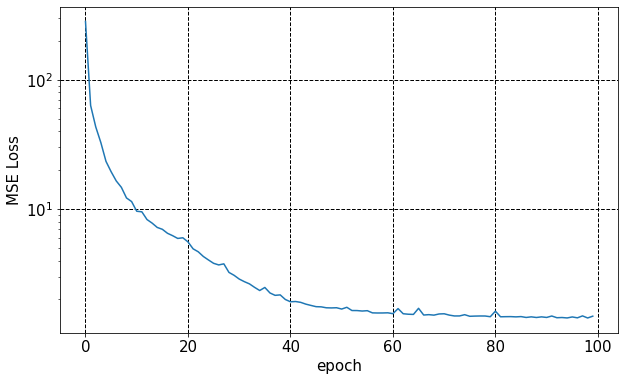

In [7]:
# Show how MSE loss gets smaller as epoch grows.
# You don't really need to go to 100 epoch.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
plt.semilogy(plot_x, plot_y)
plt.xlabel('epoch')
plt.ylabel('MSE Loss')
plt.grid(color='k', linestyle='--', linewidth=1)

In [8]:
# See the MSE loss of the final CNN
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels)

    print('MSE Loss: {:4.4f}'.format(loss.item()))

MSE Loss: 1.4864


In [9]:
# Show the labels and CNN outputs for comparison. They're close!
print(labels)
print(outputs)

tensor([[58.0239, 57.1334, 57.9377,  ..., 56.8264, 55.0774, 56.0447],
        [38.8479, 40.6765, 38.8116,  ..., 40.0960, 40.1727, 38.0893],
        [16.0136, 16.2150, 15.7720,  ..., 16.1113, 16.3642, 16.1054],
        ...,
        [27.1592, 26.5875, 24.2157,  ..., 25.7890, 25.8410, 26.2219],
        [16.7656, 16.8980, 15.5255,  ..., 15.3452, 14.8976, 16.5127],
        [56.3760, 57.0143, 55.4928,  ..., 54.1723, 52.3329, 56.0556]])
tensor([[57.0942, 57.1248, 57.0688,  ..., 57.1451, 57.2950, 57.0855],
        [39.6755, 39.6008, 39.5638,  ..., 39.6108, 39.5780, 39.6852],
        [16.5574, 16.4117, 16.3887,  ..., 16.4140, 16.4389, 16.3764],
        ...,
        [26.3951, 26.2542, 26.1783,  ..., 26.2288, 26.2496, 26.2186],
        [16.5580, 16.3768, 16.3807,  ..., 16.4391, 16.5122, 16.3726],
        [53.9180, 53.9095, 53.6274,  ..., 53.7453, 53.9217, 53.8156]])


In [11]:
# Check what the EMS loss looks like ralative to the range of labels.
# 2% error over the range of labels doesn't sound so bad.
(loss.item()**0.5)/(torch.max(labels)-torch.min(labels))

tensor(0.0205)